# Funciones de distribución de probabilidades

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Distribución Uniforme

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99876.,  99929.,  99791., 100179., 100150.,  99928.,  99996.,
        100701.,  99406., 100044.]),
 array([ 1.00007777, 10.90006328, 20.80004878, 30.70003428, 40.60001978,
        50.50000529, 60.39999079, 70.29997629, 80.19996179, 90.09994729,
        99.9999328 ]),
 <BarContainer object of 10 artists>)

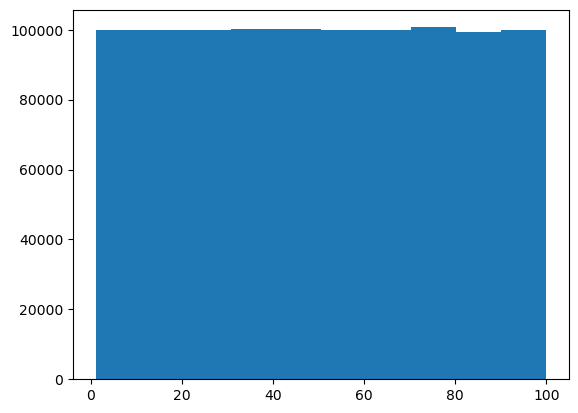

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [5]:
data = np.random.randn(1000000)

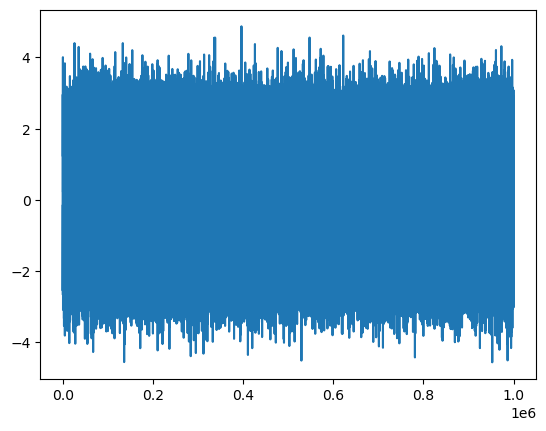

In [6]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.43000e+02, 3.64000e+03, 3.81760e+04, 1.73434e+05, 3.45860e+05,
        3.02585e+05, 1.15627e+05, 1.91370e+04, 1.35500e+03, 4.30000e+01]),
 array([-4.56808004, -3.62376863, -2.67945723, -1.73514582, -0.79083442,
         0.15347699,  1.09778839,  2.0420998 ,  2.98641121,  3.93072261,
         4.87503402]),
 <BarContainer object of 10 artists>)

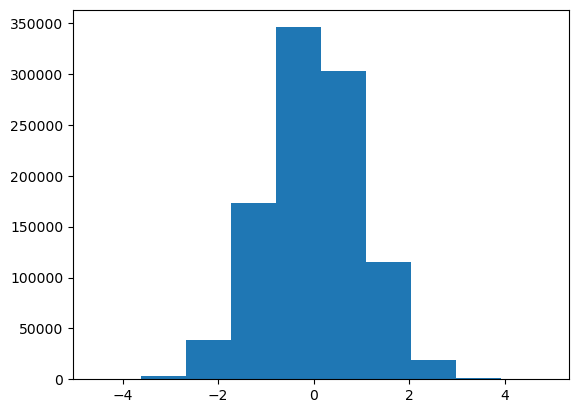

In [7]:
%matplotlib inline
plt.hist(data)

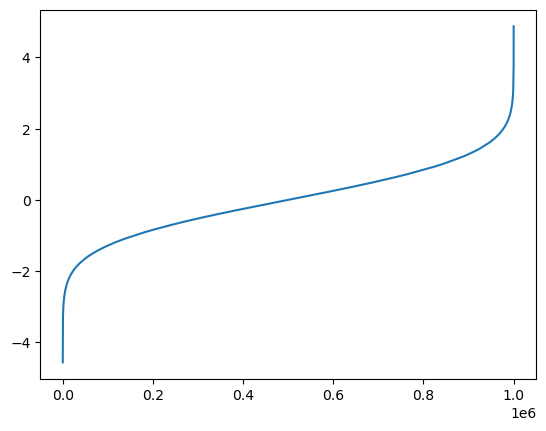

In [8]:
plt.plot(x,sorted(data))

(array([  33.,  209.,  907., 2226., 3043., 2309., 1003.,  236.,   29.,
           5.]),
 array([-3.33859493, -1.38161238,  0.57537018,  2.53235274,  4.48933529,
         6.44631785,  8.4033004 , 10.36028296, 12.31726551, 14.27424807,
        16.23123062]),
 <BarContainer object of 10 artists>)

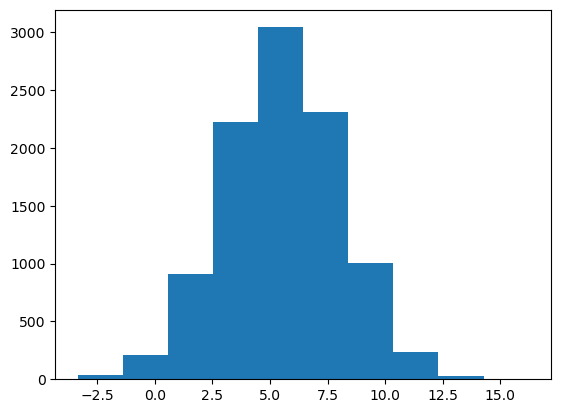

In [9]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [10]:
data = np.random.randn(2,4)
data

array([[ 0.11407839,  0.30646285,  0.50001817,  0.72533738],
       [ 0.3041592 , -0.87476152, -0.79785366,  0.93687194]])

## Simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos z = x^2 + y^2:
    * Si z < 1 -> estamos dentro del círculo.
    * Si z >= 1 -> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.

In [11]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1417359999999985


(3.1417359999999985, [<matplotlib.lines.Line2D at 0x1cab69c66d0>])

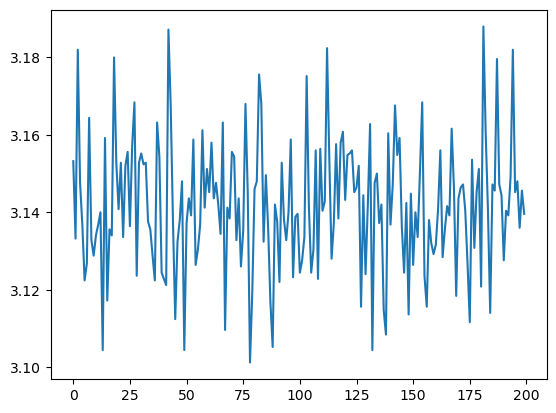

In [12]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [13]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [14]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000892,1.496997,18.516535
std,1.000434,2.503090,7.801386
min,-4.608885,-10.524394,5.000008
25%,-0.676076,-0.187696,11.751257
50%,-0.000153,1.495631,18.520914
75%,0.675195,3.184655,25.279537
max,4.998410,14.008589,31.999998


(array([1.22000e+02, 3.43100e+03, 3.86170e+04, 1.80401e+05, 3.55044e+05,
        2.98228e+05, 1.07226e+05, 1.59070e+04, 1.00500e+03, 1.90000e+01]),
 array([-4.60888485, -3.64815533, -2.68742581, -1.72669628, -0.76596676,
         0.19476277,  1.15549229,  2.11622182,  3.07695134,  4.03768087,
         4.99841039]),
 <BarContainer object of 10 artists>)

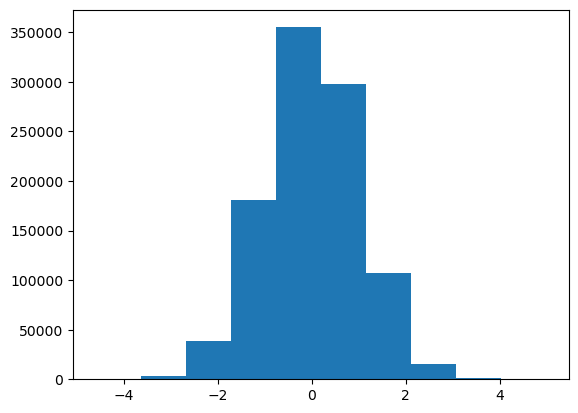

In [15]:
plt.hist(data["A"])

(array([5.90000e+01, 2.20300e+03, 2.92770e+04, 1.56967e+05, 3.50806e+05,
        3.20583e+05, 1.20216e+05, 1.87060e+04, 1.14300e+03, 4.00000e+01]),
 array([-10.52439448,  -8.07109618,  -5.61779788,  -3.16449957,
         -0.71120127,   1.74209703,   4.19539533,   6.64869363,
          9.10199193,  11.55529023,  14.00858854]),
 <BarContainer object of 10 artists>)

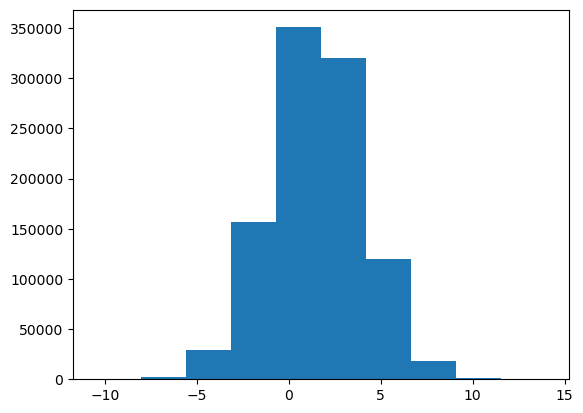

In [16]:
plt.hist(data["B"])

(array([ 99922.,  99954.,  99791.,  99433., 100134.,  99897.,  99860.,
        100102., 100318., 100589.]),
 array([ 5.00000773,  7.7000068 , 10.40000588, 13.10000495, 15.80000403,
        18.5000031 , 21.20000217, 23.90000125, 26.60000032, 29.29999939,
        31.99999847]),
 <BarContainer object of 10 artists>)

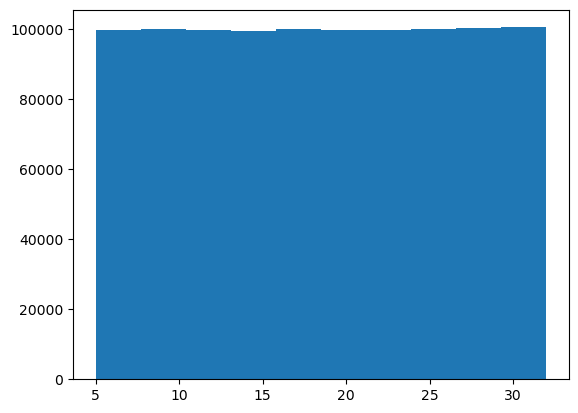

In [17]:
plt.hist(data["C"])

In [18]:
data = pd.read_csv("C:/Users/Acer Nitro 5/Documents/Python Scripts/ML/datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [20]:
colum_names = data.columns.values.tolist()
a = len(colum_names)
a

21

In [21]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

new_data

,Column Name,A,B
42,State,0.478375,0.271379
43,Account Length,0.473793,0.241618
44,Area Code,-1.932527,0.163913
45,Phone,1.114837,0.433668
46,Int'l Plan,-1.511443,0.217874
47,VMail Plan,0.123510,0.006500
48,VMail Message,1.436051,0.562991
49,Day Mins,-0.045851,0.597874
50,Day Calls,-1.025577,0.392964
51,Day Charge,-0.791968,0.261539
